In [453]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statistics
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [454]:
housing = pd.read_csv("C:/Users/barry/Documents/Data/house_sales.csv")

In [455]:
#Verify the data was loaded correctly
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [456]:
#I want to see what missing data I may have in the dataset
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [457]:
#Before I data wrangle this set, I need to know what data types are in each column
housing.dtypes

id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [458]:
#Initial descriptive statistics prior to conducting any data wrangling
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,20479.000000,20545.000000,20503.000000,2.056900e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372821,2.113507,2081.073697,1.517982e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930711,0.768913,915.043176,4.148617e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.500000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1920.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.070800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [459]:
#Before making any updates based on mean, median or mode for the missing data, I want to see what outliers there are
#This will help me avoid creating spurious entries based on outliers of the data

housing['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9286
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


In [460]:
#There is only 1 outlier in bedrooms (33).  Since bedrooms are integers, I will use mode anyways, which won't be affected by the outlier
print("Mode of bedrooms is % s" % (statistics.mode(housing['bedrooms'])))

Mode of bedrooms is 3.0


C:\Users\barry\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Boxplot of Bedrooms vs SqFt Living space')

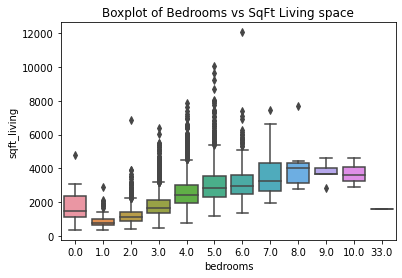

In [461]:

sns.boxplot(housing['bedrooms'], housing['sqft_living'])
plt.title("Boxplot of Bedrooms vs SqFt Living space")

In [462]:
#Some observations from the boxplot of Bedrooms vs SqFt Living Space:
#Bedrooms (33) appears to be a data entry typo and shoudl be (3) since it has essentially the same sqft_living space
#There is a lot of overlap for sqft_living space by bedrooms, making it difficult to determine how to repalce missing values
#I will come back to this later

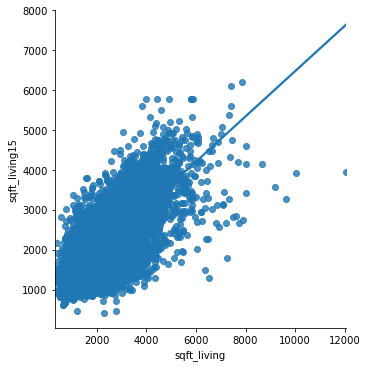

In [463]:
#Since there is another sqft column in the data, I want to compare the relationship between the two
#plotting the Scatter plot to check relationship between sqft_living and sqft_living15
sns.lmplot(x ="sqft_living", y ="sqft_living15", data = housing, order = 1, ci = None)

In [464]:
#I want to see what the average difference is between sqft_living and sqft_living15 to fill in Nan
#First, I need to drop the NaN values from sqft_living to calculate the slope
sqft = housing.dropna(subset=['sqft_living'])

#I will use this dataframe for the calculation
X = np.array(sqft['sqft_living']).reshape(-1, 1)
y = np.array(sqft['sqft_living15']).reshape(-1, 1)
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
 
regr.fit(X_train, y_train)

#calculate the slope
print(regr.coef_)

[[0.56776377]]


In [465]:
#There is a 0.566 difference (on average) between sqft_living and sqft_living15
#I can use this difference (slope) to fill in the NaN values 

housing['sqft_living'].fillna((housing['sqft_living15']/0.566), inplace = True)

In [466]:
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living         0
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

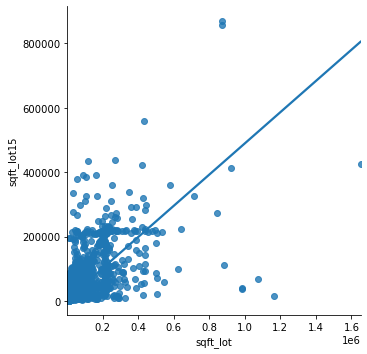

In [467]:
#I will take the same approach for sqft_lot and sqft_lot15
sns.lmplot(x ="sqft_lot", y ="sqft_lot15", data = housing, order = 1, ci = None)

In [468]:
#I want to see what the average difference is between sqft_lot and sqft_lot15 to fill in Nan
#First, I need to drop the NaN values from sqft_lot to calculate the slope
sqft = housing.dropna(subset=['sqft_lot'])

#I will use this dataframe for the calculation
X = np.array(sqft['sqft_lot']).reshape(-1, 1)
y = np.array(sqft['sqft_lot15']).reshape(-1, 1)
 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

regr = LinearRegression()
 
regr.fit(X_train, y_train)

#calculate the slope
print(regr.coef_)

[[0.48020245]]


In [469]:
#There is a 0.498 difference (on average) between sqft_lot and sqft_lot15
#I can use this difference (slope) to fill in the NaN values 

housing['sqft_lot'].fillna((housing['sqft_lot15']/0.498), inplace = True)

In [470]:
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [471]:
housing['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9286
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


In [472]:
#Returning to the bedrooms issue from before, I need to replace 33 with 3 since it is a data entry error
housing["bedrooms"] = housing["bedrooms"].replace(33.0, 3.0, regex=True)

#check that the value has been replaced
housing['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9287
4.0,6519
2.0,2617
5.0,1539
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


In [473]:
#I want to look at correlations between all of the variables now to see how to solve for NaN in bedrooms and bathrooms
#Heat map of the correlation amongst the variables
housing.corr(method ='pearson')

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.004794,0.002095,-0.008778,-0.131605,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.318373,0.526600,0.654347,0.088691,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.004794,0.318373,1.000000,0.530558,0.548034,0.027701,0.184539,-0.004450,0.085195,0.024955,0.369402,0.492133,0.308876,0.161578,0.020842,-0.159061,-0.010992,0.135205,0.404490,0.026450
bathrooms,0.002095,0.526600,0.530558,1.000000,0.700669,0.086855,0.501394,0.068412,0.186092,-0.125976,0.665890,0.685552,0.284030,0.507716,0.049887,-0.205680,0.027456,0.224369,0.569493,0.088615
sqft_living,-0.008778,0.654347,0.548034,0.700669,1.000000,0.161830,0.331802,0.096460,0.267839,-0.057281,0.717091,0.819804,0.394047,0.302899,0.047020,-0.197657,0.048038,0.234724,0.730269,0.175242
sqft_lot,-0.131605,0.088691,0.027701,0.086855,0.161830,1.000000,-0.007073,0.022769,0.074193,-0.006978,0.111256,0.181877,0.014134,0.053566,0.007679,-0.131221,-0.087056,0.229595,0.147991,0.737288
floors,0.018525,0.256794,0.184539,0.501394,0.331802,-0.007073,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.266369,-0.004450,0.068412,0.096460,0.022769,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011592,0.397293,0.085195,0.186092,0.267839,0.074193,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,-0.023783,0.036362,0.024955,-0.125976,-0.057281,-0.006978,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406


In [474]:
#bathrooms and sqft_living have a 0.70 correlation, but the boxplots show a lot of overlap. 
#I want to change the view and look at bathrooms by bin size for sqft_living as a histogram to find another method

housing['sqft_bins'] = pd.cut(housing['sqft_living'], bins = [0, 2000, 4000, 6000, 8000, 10000, float('Inf')], labels = ["0-2000", "2000-4000", "4000-6000", "6000-8000", "8000-10000", "above 10000"])

In [475]:
#Verify the data column was correctly built
housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_bins
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0-2000
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2000-4000
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0-2000
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0-2000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0-2000
5,7237550310,20140512T000000,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,...,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930,4000-6000
6,1321400060,20140627T000000,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,...,1715,0,1995,0,98003,47.3097,-122.327,2238,6819,0-2000
7,2008000270,20150115T000000,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,...,1060,0,1963,0,98198,47.4095,-122.315,1650,9711,0-2000
8,2414600126,20150415T000000,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,...,1050,730,1960,0,98146,47.5123,-122.337,1780,8113,0-2000
9,3793500160,20150312T000000,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,...,1890,0,2003,0,98038,47.3684,-122.031,2390,7570,0-2000


array([[<AxesSubplot:title={'center':'0-2000'}>,
        <AxesSubplot:title={'center':'2000-4000'}>],
       [<AxesSubplot:title={'center':'4000-6000'}>,
        <AxesSubplot:title={'center':'6000-8000'}>],
       [<AxesSubplot:title={'center':'8000-10000'}>,
        <AxesSubplot:title={'center':'above 10000'}>]], dtype=object)

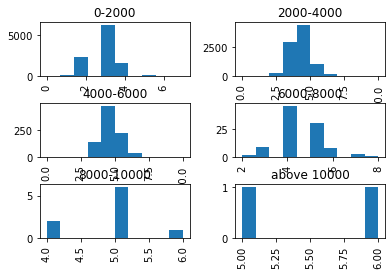

In [476]:
#Now to visualize the bedroom histogram based on sqft_bins
housing['bedrooms'].hist(by=housing['sqft_bins'])

In [477]:
#create a list to append into based on values for sqft_living in the housing df:
bed_assign = []

for row in housing['sqft_living']:
    if row <= 2000:    
        bed_assign.append(3.0)
    elif 2000 < row < 8000:
        bed_assign.append(4.0)
    elif row >= 8000:   
        bed_assign.append(5.0)

In [478]:
housing['bed_assign'] = bed_assign
housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_bins,bed_assign
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,0-2000,3.0
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2000-4000,4.0
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,0-2000,3.0
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,0-2000,3.0
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,0-2000,3.0
5,7237550310,20140512T000000,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,...,1530,2001,0,98053,47.6561,-122.005,4760,101930,4000-6000,4.0
6,1321400060,20140627T000000,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,0-2000,3.0
7,2008000270,20150115T000000,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,0-2000,3.0
8,2414600126,20150415T000000,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,...,730,1960,0,98146,47.5123,-122.337,1780,8113,0-2000,3.0
9,3793500160,20150312T000000,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,...,0,2003,0,98038,47.3684,-122.031,2390,7570,0-2000,3.0


In [479]:
#Now that I have created a column with the bedroom values I want to impute for NaN, I can write a code to copy them

housing.bedrooms.fillna(housing.bed_assign,inplace = True)

In [480]:
#check that the value has been replaced - the 3, 4 and 5 bedrooms should increase
housing['bedrooms'].value_counts().to_frame()

,bedrooms
3.0,9863
4.0,7076
2.0,2617
5.0,1540
6.0,263
1.0,189
7.0,34
8.0,12
0.0,11
9.0,5


In [481]:
#The last variable with missing data is bathrooms
housing.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms        1068
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
sqft_bins           0
bed_assign          0
dtype: int64

array([[<AxesSubplot:title={'center':'0-2000'}>,
        <AxesSubplot:title={'center':'2000-4000'}>],
       [<AxesSubplot:title={'center':'4000-6000'}>,
        <AxesSubplot:title={'center':'6000-8000'}>],
       [<AxesSubplot:title={'center':'8000-10000'}>,
        <AxesSubplot:title={'center':'above 10000'}>]], dtype=object)

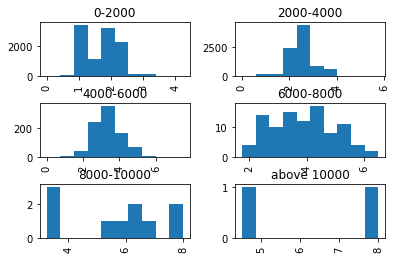

In [482]:
#I will visualize bathrooms in the same was as I did for bedrooms:

#Now to visualize the bathroom histogram based on sqft_bins
housing['bathrooms'].hist(by=housing['sqft_bins'])

In [483]:
#check the values of bathrooms prior to imputing to the NaN values:
housing['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5115
1.00,3667
1.75,2901
2.25,1951
2.00,1828
1.50,1383
2.75,1121
3.00,713
3.50,690
3.25,558


In [484]:
'''The distribution for bathrooms will also have a 3-level approach:
if 0-6000 : 3 bathrooms
if 6000-8000: 4 bathrooms
if above 8000: 6 bathrooms'''

#create a list to append into based on values for sqft_living in the housing df (using 3 if <=4000sqft and 5 if above 4000sqft)
bath_assign = []

for row in housing['sqft_living']:
    if row <= 6000:    
        bath_assign.append(3.0)
    elif 2000 < row < 8000:
        bath_assign.append(4.0)
    elif row >= 8000:   
        bath_assign.append(6.0)

In [485]:
#Check that the code created the df appropriately:
housing['bath_assign'] = bath_assign
housing.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_bins,bed_assign,bath_assign
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,0-2000,3.0,3.0
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,2000-4000,4.0,3.0
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,0-2000,3.0,3.0
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,0-2000,3.0,3.0
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,0-2000,3.0,3.0
5,7237550310,20140512T000000,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,...,2001,0,98053,47.6561,-122.005,4760,101930,4000-6000,4.0,3.0
6,1321400060,20140627T000000,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,...,1995,0,98003,47.3097,-122.327,2238,6819,0-2000,3.0,3.0
7,2008000270,20150115T000000,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,...,1963,0,98198,47.4095,-122.315,1650,9711,0-2000,3.0,3.0
8,2414600126,20150415T000000,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,...,1960,0,98146,47.5123,-122.337,1780,8113,0-2000,3.0,3.0
9,3793500160,20150312T000000,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,...,2003,0,98038,47.3684,-122.031,2390,7570,0-2000,3.0,3.0


In [486]:
#Now that I have created a column with the bathroom values I want to impute for NaN, I can write a code to copy them

housing.bathrooms.fillna(housing.bath_assign,inplace = True)

In [487]:
#check that the value has been replaced - the 3, 4 and 6 bathrooms should increase
housing['bathrooms'].value_counts().to_frame()

,bathrooms
2.50,5115
1.00,3667
1.75,2901
2.25,1951
2.00,1828
3.00,1777
1.50,1383
2.75,1121
3.50,690
3.25,558


In [488]:
#Check for missing data
housing.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
sqft_bins        0
bed_assign       0
bath_assign      0
dtype: int64

In [489]:
#I will drop some rows now that are not beneficial for future analysis, such as the columns I added and 'id'
housing.drop(["id", "bed_assign", "bath_assign", "sqft_bins"], axis = 1, inplace = True)
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [490]:
#I noticed that the date column is not in a format we would use to describe data. I needs to be converted to years, months, days, etc
housing["date"] = pd.to_datetime(housing.date)
housing["year"] = housing.date.dt.year
housing["month"] = housing.date.dt.month
housing["day"] = housing.date.dt.day
housing["day_of_week"] = housing.date.dt.day_name()

In [491]:
housing.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
0,2014-10-13,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,Monday
1,2014-12-09,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,Tuesday
2,2015-02-25,180000,2.0,1.00,770.0,10000.0,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,Wednesday
3,2014-12-09,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,Tuesday
4,2015-02-18,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,Wednesday


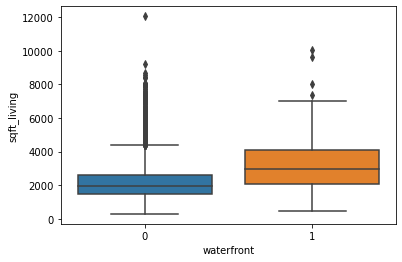

In [493]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="waterfront", y="sqft_living", data=housing)
plt.show()

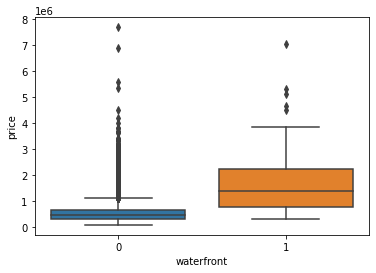

In [495]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="waterfront", y="price", data=housing)
plt.show()

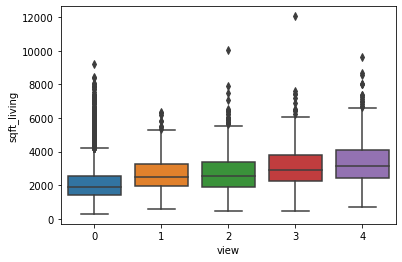

In [496]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="view", y="sqft_living", data=housing)
plt.show()

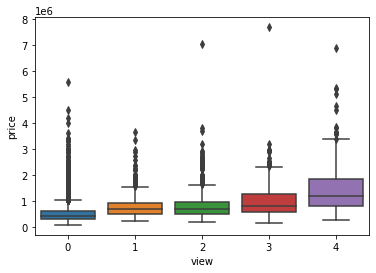

In [497]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
plt.figure(figsize=(6,4))
ax = sns.boxplot(x="view", y="price", data=housing)
plt.show()

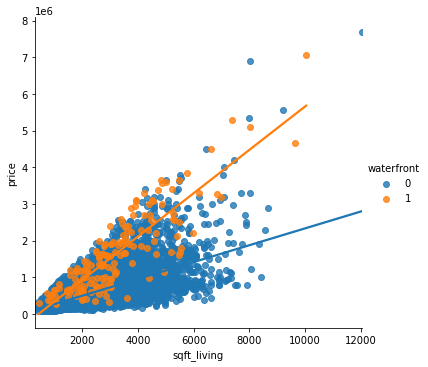

In [503]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
sns.lmplot(x ="sqft_living", y ="price", hue = "waterfront", data = housing, order = 1, ci = None)

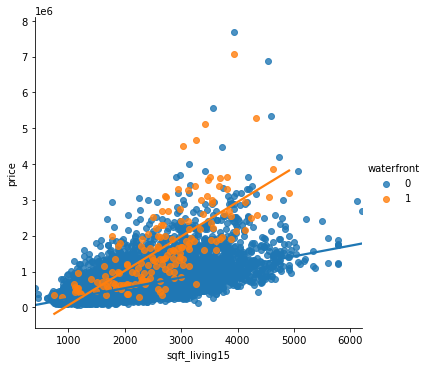

In [502]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
sns.lmplot(x ="sqft_living15", y ="price", hue = "waterfront", data = housing, order = 1, ci = None)

In [505]:
#It seems there are some outliers in price.  I want to look at these more closely
housing['price'].quantile([0.25,0.5,0.75])

0.25    321950.0
0.50    450000.0
0.75    645000.0
Name: price, dtype: float64

In [506]:
#The interquartile range is:
Q3 = np.quantile(housing['price'], 0.75)
Q1 = np.quantile(housing['price'], 0.25)
IQR = Q3 - Q1
 
print("IQR value for column price is", (IQR))

IQR value for column price is 323050.0


In [509]:
#It seems there are some outliers in price.  I want to look at these more closely
outlier_list = []
lower_range = Q1 - 1.5 * IQR
upper_range = Q3 + 1.5 * IQR
for x in housing['price']: 
        if ((x < lower_range) or (x > upper_range)):
            outlier_list.append(x)
    
outliers = pd.DataFrame(outlier_list)
print(outliers)

            0
0     1225000
1     2000000
2     1350000
3     1325000
4     1450000
...       ...
1141  1700000
1142  3567000
1143  1222500
1144  1575000
1145  1537000

[1146 rows x 1 columns]


In [510]:
#This analysis produces a lot of results, I am going to try 3x IQR to narrow down high outliers
outlier_list = []
lower_range = Q1 - 3 * IQR
upper_range = Q3 + 3 * IQR
for x in housing['price']: 
        if ((x < lower_range) or (x > upper_range)):
            outlier_list.append(x)
    
outliers = pd.DataFrame(outlier_list)
print(outliers)

           0
0    2000000
1    2250000
2    2400000
3    2900000
4    2050000
..       ...
415  1865000
416  3000000
417  1881580
418  1700000
419  3567000

[420 rows x 1 columns]


In [511]:
#I want to subset the outliers so I can eventually see how different they are to the original
housing_outliers = housing[housing['price'].isin(outlier_list)]
print(housing_outliers)

            date    price  bedrooms  bathrooms  sqft_living      sqft_lot  \
21    2014-08-26  2000000       3.0       2.75       3050.0  44867.000000   
153   2015-04-01  2250000       4.0       3.25       5180.0  19850.000000   
246   2014-09-29  2400000       4.0       2.50       3650.0   8354.000000   
269   2015-05-04  2900000       4.0       3.25       5050.0  40281.124498   
282   2015-05-13  2050000       5.0       3.00       3830.0   8480.000000   
...          ...      ...       ...        ...          ...           ...   
21514 2015-02-27  1865000       4.0       3.75       3790.0   8797.000000   
21530 2015-04-07  3000000       4.0       3.75       5090.0  14823.000000   
21540 2015-01-13  1881580       5.0       3.50       4410.0  13000.000000   
21568 2015-01-30  1700000       4.0       3.50       3830.0   8963.000000   
21576 2015-01-07  3567000       5.0       4.50       4850.0  10584.000000   

       floors  waterfront  view  condition  ...  yr_renovated  zipcode  \
2

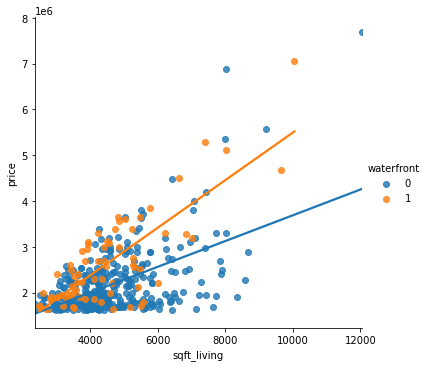

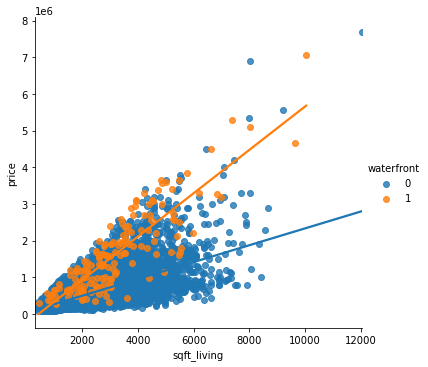

In [513]:
#Exploratory analysis: I want to look at the data distribution for specific columns to identify any outliers
sns.lmplot(x ="sqft_living", y ="price", hue = "waterfront", data = housing_outliers, order = 1, ci = None)
sns.lmplot(x ="sqft_living", y ="price", hue = "waterfront", data = housing, order = 1, ci = None)

In [514]:
#Broadly speaking, the trend lines are similar which makes me confident I picked a good sampling from 3x IQR.
#I can also tell that the high and low values have been selected which should help the model we create

In [516]:
housing.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.377736,2.157498,2153.147323,1.554776e+04,1.494309,0.007542,0.234303,3.409430,7.656873,...,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954,6.574423,15.688197
std,3.671272e+05,0.891125,0.774225,982.367351,4.160219e+04,0.539989,0.086517,0.766318,0.650743,1.175459,...,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616,3.115308,8.635063
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.219500e+05,3.000000,1.750000,1450.000000,5.105000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000,4.000000,8.000000
50%,4.500000e+05,3.000000,2.250000,1970.000000,7.780000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000,6.000000,16.000000
75%,6.450000e+05,4.000000,2.500000,2640.000000,1.130500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000,9.000000,23.000000
max,7.700000e+06,10.000000,8.000000,12050.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000,31.000000


In [517]:
housing_outliers.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,4.200000e+02,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,...,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,2.254861e+06,4.257143,3.566071,4599.840939,28771.549914,1.871429,0.171429,1.728571,3.504762,10.390476,...,1974.873810,309.183333,98060.630952,47.617556,-122.227521,3351.935714,19180.909524,2014.345238,6.378571,15.002381
std,7.645877e+05,0.916865,0.951201,1346.691580,74693.550699,0.475051,0.377333,1.678914,0.726239,1.162215,...,33.338587,723.430941,56.049667,0.052563,0.095809,812.718846,30068.531973,0.476013,3.156539,8.901342
min,1.615000e+06,2.000000,1.750000,2350.000000,1880.000000,1.000000,0.000000,0.000000,2.000000,7.000000,...,1900.000000,0.000000,98004.000000,47.416900,-122.416000,1490.000000,2199.000000,2014.000000,1.000000,1.000000
25%,1.761500e+06,4.000000,3.000000,3730.000000,8942.500000,2.000000,0.000000,0.000000,3.000000,10.000000,...,1950.000000,0.000000,98006.000000,47.583125,-122.284000,2867.500000,8544.500000,2014.000000,4.000000,8.000000
50%,1.988250e+06,4.000000,3.500000,4340.000000,14754.000000,2.000000,0.000000,2.000000,3.000000,10.000000,...,1988.000000,0.000000,98040.000000,47.625900,-122.224000,3290.000000,13036.500000,2014.000000,6.000000,14.000000
75%,2.476000e+06,5.000000,4.000000,5230.000000,21360.000000,2.000000,0.000000,3.000000,4.000000,11.000000,...,2004.000000,0.000000,98112.000000,47.639925,-122.202000,3840.000000,19281.000000,2015.000000,9.000000,23.000000
max,7.700000e+06,8.000000,8.000000,12050.000000,920423.000000,3.500000,1.000000,4.000000,5.000000,13.000000,...,2015.000000,2014.000000,98199.000000,47.762400,-121.756000,6210.000000,411962.000000,2015.000000,12.000000,31.000000


In [518]:
#If I drop the outliers (#420) from the whole dataset (#21613) this represents only 1.9% of the data
houses = housing[~housing.price.isin(outlier_list)]
houses.head(10)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,day_of_week
0,2014-10-13,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,3,...,0,98178,47.5112,-122.257,1340,5650,2014,10,13,Monday
1,2014-12-09,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,3,...,1991,98125,47.7210,-122.319,1690,7639,2014,12,9,Tuesday
2,2015-02-25,180000,2.0,1.00,770.0,10000.0,1.0,0,0,3,...,0,98028,47.7379,-122.233,2720,8062,2015,2,25,Wednesday
3,2014-12-09,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,5,...,0,98136,47.5208,-122.393,1360,5000,2014,12,9,Tuesday
4,2015-02-18,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,3,...,0,98074,47.6168,-122.045,1800,7503,2015,2,18,Wednesday
5,2014-05-12,1225000,4.0,4.50,5420.0,101930.0,1.0,0,0,3,...,0,98053,47.6561,-122.005,4760,101930,2014,5,12,Monday
6,2014-06-27,257500,3.0,2.25,1715.0,6819.0,2.0,0,0,3,...,0,98003,47.3097,-122.327,2238,6819,2014,6,27,Friday
7,2015-01-15,291850,3.0,1.50,1060.0,9711.0,1.0,0,0,3,...,0,98198,47.4095,-122.315,1650,9711,2015,1,15,Thursday
8,2015-04-15,229500,3.0,1.00,1780.0,7470.0,1.0,0,0,3,...,0,98146,47.5123,-122.337,1780,8113,2015,4,15,Wednesday
9,2015-03-12,323000,3.0,2.50,1890.0,6560.0,2.0,0,0,3,...,0,98038,47.3684,-122.031,2390,7570,2015,3,12,Thursday


In [519]:
houses.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day
count,2.119300e+04,21193.000000,21193.000000,21193.000000,2.119300e+04,21193.000000,21193.000000,21193.000000,21193.000000,21193.000000,...,21193.000000,21193.000000,21193.000000,21193.000000,21193.000000,21193.000000,21193.000000,21193.000000,21193.000000,21193.000000
mean,5.061050e+05,3.360308,2.129583,2104.659080,1.528569e+04,1.486835,0.004294,0.204690,3.407540,7.602699,...,1970.928467,79.947577,98078.282829,47.558913,-122.213626,1959.493512,12641.374510,2014.322512,6.578304,15.701788
std,2.578066e+05,0.881811,0.743850,909.572208,4.063496e+04,0.538545,0.065388,0.705706,0.649036,1.109661,...,29.285133,391.375984,53.398087,0.139495,0.141564,654.470867,27232.087103,0.467449,3.114436,8.629368
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000,1.000000
25%,3.200000e+05,3.000000,1.750000,1440.000000,5.092000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1951.000000,0.000000,98033.000000,47.466900,-122.329000,1480.000000,5080.000000,2014.000000,4.000000,8.000000
50%,4.460000e+05,3.000000,2.250000,1950.000000,7.700000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,1975.000000,0.000000,98065.000000,47.569800,-122.231000,1820.000000,7575.000000,2014.000000,6.000000,16.000000
75%,6.261000e+05,4.000000,2.500000,2597.173145,1.108000e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,1996.000000,0.000000,98118.000000,47.678800,-122.124000,2330.000000,10000.000000,2015.000000,9.000000,23.000000
max,1.612500e+06,10.000000,7.500000,8427.561837,1.651359e+06,3.500000,1.000000,4.000000,5.000000,12.000000,...,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000,2015.000000,12.000000,31.000000


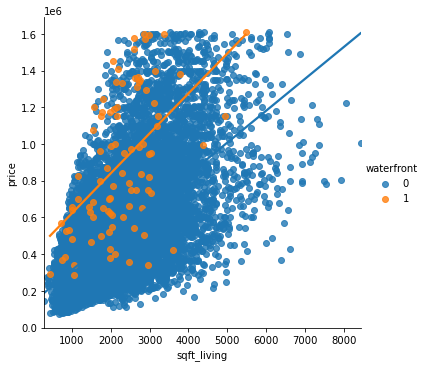

In [520]:
sns.lmplot(x ="sqft_living", y ="price", hue = "waterfront", data = houses, order = 1, ci = None)